In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
car_data = pd.read_csv('./CarPrice_Assignment.csv')

In [3]:
pd.options.display.max_columns = None
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Pre Processing

In [4]:
# ignoring car id
car_data.drop('car_ID', axis=1, inplace=True)

## Categorical -> Numerical

In [5]:
car_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
# get make of car, might be useful. After that, car name is not needed
car_data['make'] = car_data['CarName'].apply(lambda x: x.split(' ')[0])
car_data.drop('CarName', axis=1, inplace=True)


In [8]:
# smake all object dtypes into categories, and encode
for col_name in car_data:
    if car_data[col_name].dtype == 'object':
        car_data[col_name] = car_data[col_name].astype('category')
        car_data[col_name] = car_data[col_name].cat.codes


In [9]:
car_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0,26
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0,26
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0,26
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0,26


# Training/Test Split

Now that categorical data has been encoded to numerical data, we can split the data set into a feature set and a target set (target set contains prices).

After this, we need to further split the data into a training set (to train our models) and a testing test (to test our models)

In [10]:
price_df = car_data['price']
feature_df = car_data.drop('price', axis=1)

In [11]:
features_np = feature_df.to_numpy(dtype='float32')
targets_np = price_df.to_numpy(dtype='float32')

In [12]:
from torch.utils.data import TensorDataset, DataLoader

train_len = int(features_np.shape[0] * .8)
test_len = features_np.shape[0] - train_len

X_train = torch.from_numpy(features_np[0:train_len])
X_test = torch.from_numpy(features_np[train_len: len(features_np) + 1])

Y_train = torch.from_numpy(targets_np[0:train_len])
Y_test = torch.from_numpy(targets_np[train_len: len(feature_df) + 1])

Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

train_ds = TensorDataset(X_train, Y_train)
batch_size= X_train.shape[0]
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))


[tensor([[ 1.,  1.,  0.,  ..., 31., 38., 22.],
         [ 2.,  1.,  0.,  ..., 24., 29.,  8.],
         [ 2.,  1.,  0.,  ..., 37., 41., 13.],
         ...,
         [ 3.,  1.,  0.,  ..., 17., 25., 18.],
         [ 0.,  1.,  0.,  ..., 19., 24., 15.],
         [ 3.,  1.,  0.,  ..., 17., 25., 17.]]),
 tensor([[ 6338.0000],
         [11048.0000],
         [ 5389.0000],
         [13499.0000],
         [ 6095.0000],
         [ 7499.0000],
         [13495.0000],
         [ 8921.0000],
         [10198.0000],
         [ 6692.0000],
         [ 6479.0000],
         [30760.0000],
         [35056.0000],
         [ 9959.0000],
         [ 8778.0000],
         [ 8189.0000],
         [ 6695.0000],
         [12764.0000],
         [14399.0000],
         [13950.0000],
         [ 7053.0000],
         [ 6229.0000],
         [12964.0000],
         [ 6855.0000],
         [24565.0000],
         [ 9279.0000],
         [ 7395.0000],
         [ 6377.0000],
         [ 6849.0000],
         [10945.0000],
         [ 6

# Modelling

In [13]:
import torch.nn as nn

In [14]:
# define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.fc1(x)


model = Net()
print(model)

Net(
  (fc1): Linear(in_features=24, out_features=1, bias=True)
)


In [15]:
# Define optimizer (Adam is just algorithm for gradient descent, could use SGD as well)
opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
# Import nn.functional
import torch.nn.functional as F

In [17]:
# Define loss function
loss_fn = F.mse_loss

In [18]:
loss = loss_fn(model(X_train), Y_train)
print(loss)

tensor(2.8676e+08, grad_fn=<MseLossBackward>)


In [19]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    epoch_loss = []
    for epoch in range(num_epochs):
        next(iter(train_dl))
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            epoch_loss.append(loss.data)
            # Perform gradient descent
            opt.zero_grad()
            loss.backward()
            opt.step()
    print('Training loss: ', loss_fn(model(X_train), Y_train))

In [20]:
# Train the model for 5000 epochs
fit(5000, model, loss_fn, opt)

Training loss:  tensor(18205114., grad_fn=<MseLossBackward>)


# Evalutation

## Model Training

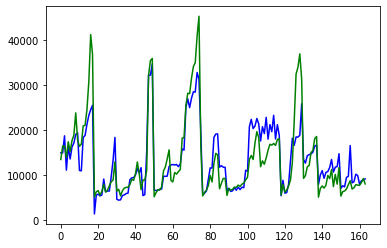

In [21]:
# Generate predictions after training
preds = model(X_train)

# blue line is model predictions
plt.plot(preds.detach().numpy(), 'b')

# green line is target value
plt.plot(Y_train.detach().numpy(), 'g')

In [22]:
loss = 0
for prediction, target in zip(preds, Y_train):
    loss += loss_fn(prediction, target)

avg_loss = loss / preds.shape[0]
avg_loss

tensor(18205114., grad_fn=<DivBackward0>)

## Model Testing

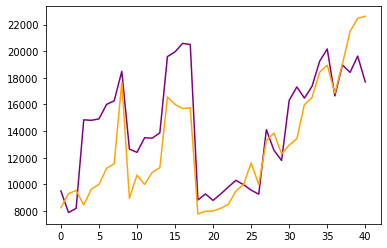

In [23]:
# Now, use model on test data and see how it performs:
test_predictions = model(X_test)

# purple line is model predictions
plt.plot(test_predictions.detach().numpy(), 'purple')

# orange line is target value`
plt.plot(Y_test.detach().numpy(), 'orange')

In [24]:
loss = 0
for prediction, target in zip(test_predictions, Y_test):
    loss += loss_fn(prediction, target)

avg_loss = loss / test_predictions.shape[0]
avg_loss


tensor(8359429.5000, grad_fn=<DivBackward0>)